Here we import all necessary libraries. Matplotlib for plotting, NumPy for numerical operations, and various functions and models from `sklearn`. These include dataset loading functions, model evaluation metrics, data splitting utilities, standardization tools, and the classifiers we intend to use.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

The breast cancer dataset is loaded from `sklearn.datasets`. This dataset includes features related to breast cancer cases and a target variable indicating the presence or absence of cancer. `X` and `y` represent the feature set and the target variable, respectively.


In [3]:
# Load the breast cancer dataset
data = datasets.load_breast_cancer()
X, y = data.data, data.target

The dataset is divided into training and testing sets using `train_test_split`. We use 70% of the data for training and the remaining 30% for testing. This split ensures we have enough data to train our models and a separate set to evaluate their performance.



In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Standardizing the data is crucial for many machine learning algorithms. This process scales the data so that it has a mean of 0 and a standard deviation of 1. It helps in speeding up the training process and can lead to better model performance.


In [5]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


We initialize an array of classifiers, including Logistic Regression, Naive Bayes, Linear and Quadratic Discriminant Analysis, K-Nearest Neighbors, and Support Vector Machines. These models will be trained and tested on the dataset.


In [6]:
# Initialize classifiers
classifiers = [
    LogisticRegression(C=1e5),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel='rbf', gamma=1e-4, probability=True)  # probability=True for ROC AUC
]

# Classifier names
names = ["Logistic Regression", "Naive Bayes", "Linear DA", "Quadratic DA", "KNN", "SVM"]


We prepare empty lists to store the scores for different evaluation metrics - accuracy, precision, recall, F1-score, and ROC AUC. These metrics provide a comprehensive view of each classifier's performance.


In [7]:
# Initialize metrics
accuracy, precision, recall, f1, roc_auc = [], [], [], [], []

Each classifier is trained on the training set and then used to make predictions on the test set. We then calculate the various evaluation metrics for each model. Note that for ROC AUC, we handle models that don't naturally output probabilities (like SVM) by checking if the `predict_proba` method is available.


In [8]:
# Evaluate each model
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else y_pred  # For ROC AUC

    # Calculate metrics
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_proba))


C:\Users\eliot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finally, we plot the results using a bar chart. Each group of bars represents a different classifier, and each bar within a group shows a different metric. This visualization makes it easy to compare the performance of the classifiers across various metrics.


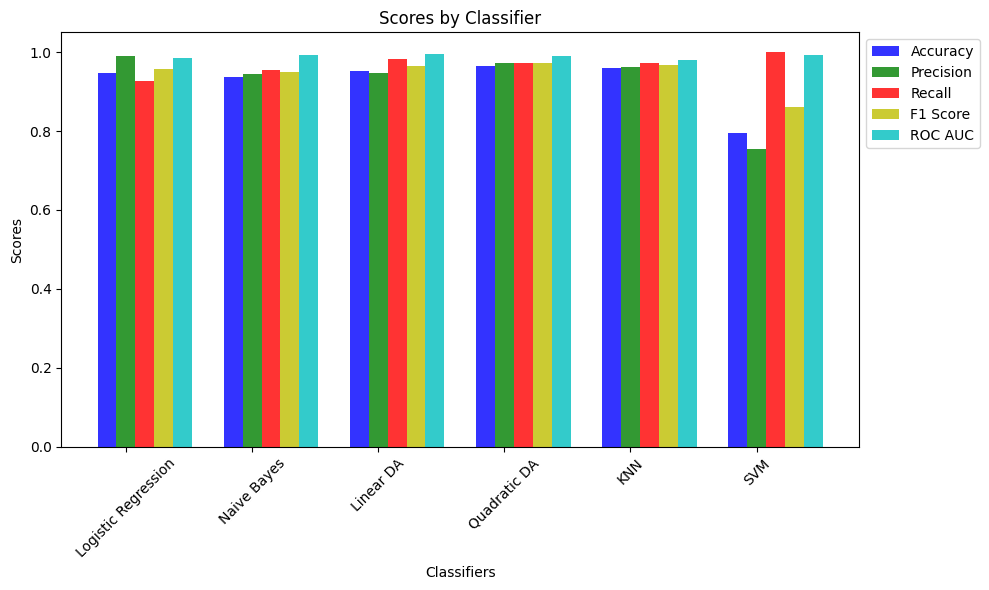

In [10]:
# Plotting
n_groups = len(classifiers)
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size
bar1 = ax.bar(index, accuracy, bar_width, alpha=opacity, color='b', label='Accuracy')
bar2 = ax.bar(index + bar_width, precision, bar_width, alpha=opacity, color='g', label='Precision')
bar3 = ax.bar(index + 2*bar_width, recall, bar_width, alpha=opacity, color='r', label='Recall')
bar4 = ax.bar(index + 3*bar_width, f1, bar_width, alpha=opacity, color='y', label='F1 Score')
bar5 = ax.bar(index + 4*bar_width, roc_auc, bar_width, alpha=opacity, color='c', label='ROC AUC')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Scores by Classifier')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(names, rotation=45)  # Rotate x-axis labels
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside of the plot

plt.tight_layout()
plt.show()
